In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Dataset

In [2]:
df = pd.read_csv(
    'smsspamcollection/SMSSpamCollection',
    sep='\t',
    names=["label", "message"])

display(df.head())
display(df.info())
display(df.describe())

display(df['label'].value_counts())
display(df.groupby('label').describe())

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


None

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


ham     4825
spam     747
Name: label, dtype: int64

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## Add length as a new feature

In [3]:
df['length'] = df['message'].apply(len)

display(df.head())

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

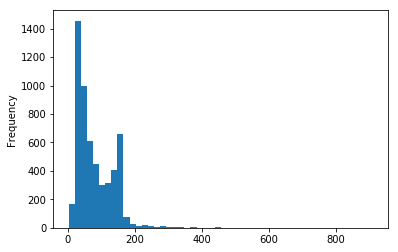

In [4]:
# Message stats
display(df['length'].describe())
df['length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd600789da0>,
      dtype=object)

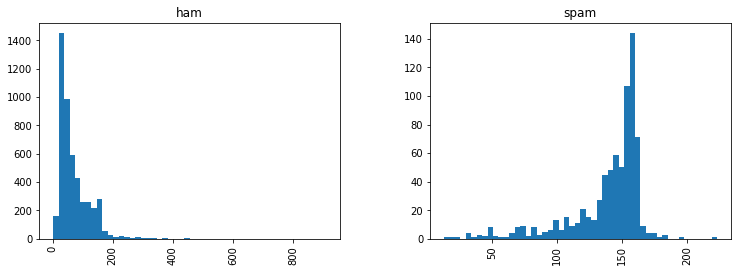

In [5]:
# Message stats by label
df.hist(column='length', by='label', bins=50,figsize=(12,4))

## Text Pre-Processing

#### Remove punctuations

In [8]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

display(mess)
display(nopunc)

'Sample message! Notice: it has punctuation.'

'Sample message Notice it has punctuation'

#### Remove Stopwords

In [6]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [10]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

clean_mess

['Sample', 'message', 'Notice', 'punctuation']

#### Apply to dataset
1. Remove all punctuation
2. Remove all stopwords
3. Returns a list of the cleaned text

In [11]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [13]:
df['message'] = df['message'].apply(text_process)

df.head()

,label,message,length
0,ham,"[Go, jurong, point, crazy, Available, bugis, n...",111
1,ham,"[Ok, lar, Joking, wif, u, oni]",29
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",155
3,ham,"[U, dun, say, early, hor, U, c, already, say]",49
4,ham,"[Nah, dont, think, goes, usf, lives, around, t...",61


## Continuing Normalization